## DATA PREPROCESSING

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## DATA SPLITTING: TRAINING + TEST SETS

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## FEATURE SCALING

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## APLICACIÓN DE MODELO DE KNN (K-NEAREST NEIGHBOR A NUESTRO TRAINING SET)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## PREDICTING RESULT

In [8]:
classifier.predict(sc.transform([[30,87000]]))

array([0])

## PROBANDO CON OTRA DISTANCIA

### EUCLIDEAN DISTANCE

In [10]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', p=1)

In [11]:
classifier.predict(sc.transform([[30,87000]]))

array([0])

### MANHATTAN DISTANCE

In [12]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', p=1)

In [13]:
classifier.predict(sc.transform([[30,87000]]))

array([0])

## CONFUSION MATRIX + ACCURACY SCORE

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55  3]
 [ 1 21]]


0.95

95 % correcto.

## VISUALIZACIÓN DE KNN

/tmp/ipython-input-338002537.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


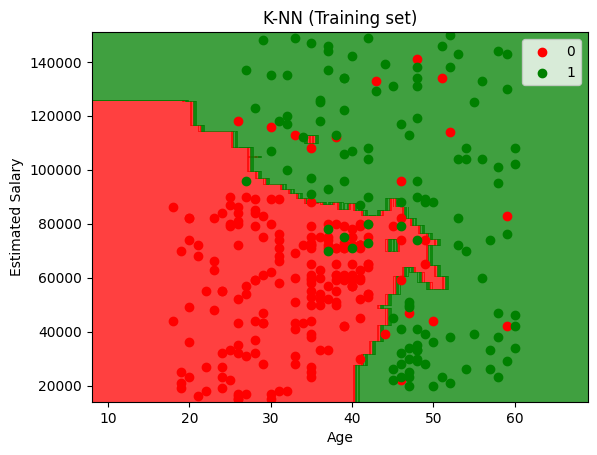

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()